In [80]:
import numpy as np

freq1 = np.array([241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 246, 247, 248,
       249, 250, 251, 251, 252, 253, 254, 255, 256, 257, 258, 259, 251,
       252, 253, 254])

amp1 = np.array([0.21399359, 0.22742931, 0.23785932, 0.25102127, 0.28710239,
       0.30308758, 0.33085464, 0.33499884, 0.35678903, 0.35771442,
       0.31116015, 0.33392172, 0.        , 0.34874451, 0.40282503,
       0.39928595, 0.40490379, 0.43704042, 0.45346539, 0.48280753,
       0.        , 0.51902536, 0.48315277, 0.52811264, 0.51672653,
       0.3847623 , 0.39958507, 0.43112068, 0.4518652 ])

stddev1 = np.array([0.00606051, 0.00605831, 0.00721218, 0.        , 0.01147971,
       0.0102119 , 0.00630098, 0.00622939, 0.01008131, 0.01196328,
       0.00619853, 0.0071087 , 0.        , 0.        , 0.00640517,
       0.01512206, 0.0060475 , 0.0061595 , 0.01864721, 0.        ,
       0.        , 0.01831048, 0.05646968, 0.02453983, 0.0060829 ,
       0.00938805, 0.01095977, 0.00559943, 0.00913507])

freq2 = np.array([222, 223, 225, 226, 227, 228, 236, 237, 238, 239, 218, 219,
       220])

amp2 = np.array([0.13384437, 0.14684916, 0.16430892, 0.17068981,
       0.1991131 , 0.22258295, 0.31054711, 0.34752884, 0.3515223 ,
       0.35796632, 0.11523392, 0.12139976, 0.11882384])

stddev2 = np.array([0.00000000e+00, 6.66846120e-03, 0.00000000e+00,
       3.36019784e-03, 0.00000000e+00, 6.96073292e-03, 2.07062426e-02,
       3.51272989e-03, 3.48269046e-03, 7.36734950e-08, 7.84501690e-03,
       2.96210811e-03, 6.00574942e-03])

In [81]:
freq = np.concatenate((freq1, freq2))
amp = np.concatenate((amp1 * 1.67, amp2 ))
stddev = np.concatenate((stddev1 * 1.67, stddev2))

In [82]:
freq-245

array([ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   1,   2,   3,
         4,   5,   6,   6,   7,   8,   9,  10,  11,  12,  13,  14,   6,
         7,   8,   9, -23, -22, -20, -19, -18, -17,  -9,  -8,  -7,  -6,
       -27, -26, -25])

In [83]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

# import matplotlib.pyplot as plt
# import sys
# sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()

import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


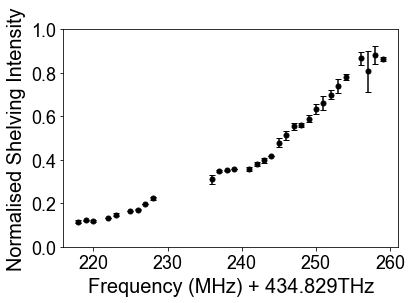

In [85]:
# exclude the zero values
freq = freq[amp != 0]
stddev = stddev[amp != 0]
amp = amp[amp != 0]

# average the values with the same frequency

freq_unique = np.unique(freq)
amp_unique = np.zeros(len(freq_unique))
stddev_unique = np.zeros(len(freq_unique))

for i, f in enumerate(freq_unique):
    amp_unique[i] = np.mean(amp[freq == f])
    stddev_unique[i] = np.sqrt(np.sum(stddev[freq == f]**2))

freq = freq_unique
amp = amp_unique
stddev = stddev_unique

# plot the data

# plt.figure(figsize=(10,6))
plt.errorbar(freq, amp, yerr=stddev,fmt='ko', markersize=5, capsize=3, capthick=1,)

plt.ylim(0,1.0,0.1)

plt.xlabel('Frequency (MHz) + 434.829THz')
plt.ylabel('Normalised Shelving Intensity')

plt.savefig('Shelving_240328_240403.png', dpi=300, bbox_inches='tight')
plt.savefig('Shelving_240328_240403.pdf', dpi=300, bbox_inches='tight')

# for x, y in zip(freq,amp):
#     plt.text(x, y, str(x))

In [67]:
0.35796632/0.21399359

1.6727899186139172